In [1]:
#importing libraries

In [1]:
# import tensorflow as tf
import numpy as np
import pickle
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#path to csv data 
path_train = '../data/external/sign_mnist_train.csv'
path_test = '../data/external/sign_mnist_test.csv'

#define image resolution 
res = (28,28)

In [3]:
#convert csv to numpy 
train = np.loadtxt(path_train, delimiter=',', skiprows=1)
test = np.loadtxt(path_test, delimiter=',', skiprows=1)

In [4]:
#training data
X_train = train[:,1:]
y_train = train[:,0]

#testing data 
X_test = test[:,1:]
y_test = test[:,0]

In [5]:
#reshape to image 
X_train = X_train.reshape(X_train.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

In [6]:
data = (X_train,y_train,X_test,y_test)

In [7]:
with open('../data/external/sign_data.pkl','wb') as f:
    pickle.dump(data, f)

In [8]:
with open('../data/external/sign_data.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)

In [9]:
#Shape of training and testing data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (27455, 28, 28)
y_train shape: (27455,)
X_test shape: (7172, 28, 28)
y_test shape: (7172,)


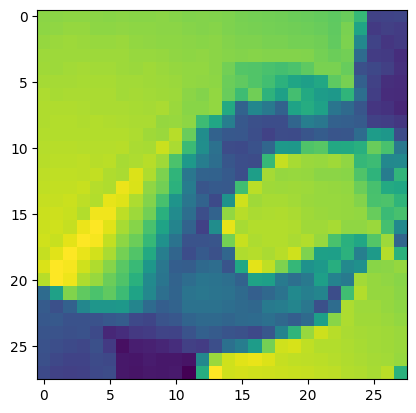

In [10]:
#visualization
import matplotlib.pyplot as plt
plt.imshow(X_train[3]);

In [12]:
# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)

In [13]:
# Reshape input numpy array to (27455, 28, 28, 1) for use with Keras data generator
x_train = np.reshape(X_train , (X_train.shape[0], 28, 28, 1))

In [14]:
# Reshape input numpy array to (27455, 28, 28, 1) for use with Keras data generator
x_test = np.reshape(X_test , (X_test.shape[0], 28, 28, 1))

In [15]:
#Fit the train data generator to the input numpy array
datagen.fit(x_train)

In [16]:
#Fit the test data generator to the input numpy array
datagen.fit(x_test)

In [17]:
#generate augmented images
augmented_train_images = datagen.flow(x_train, batch_size=x_train.shape[0], shuffle=False)

In [18]:
#generate augmented images
augmented_test_images = datagen.flow(x_test, batch_size=x_test.shape[0], shuffle=False)

In [19]:
#shape of augmented train image
augmented_train_images[0].shape

(27455, 28, 28, 1)

In [49]:
#shape of augmented test image
augmented_test_images[0].shape

(7172, 28, 28, 1)

In [20]:
#reshape augmented images back to (27455, 28, 28) numpy array
augmented_train_array = np.reshape(augmented_train_images[0], (augmented_train_images[0].shape[0], 28, 28))

In [21]:
augmented_test_array = np.reshape(augmented_test_images[0], (augmented_test_images[0].shape[0], 28, 28))

In [22]:
#checking shape of augmented image
augmented_train_array.shape
augmented_test_array.shape

(7172, 28, 28)

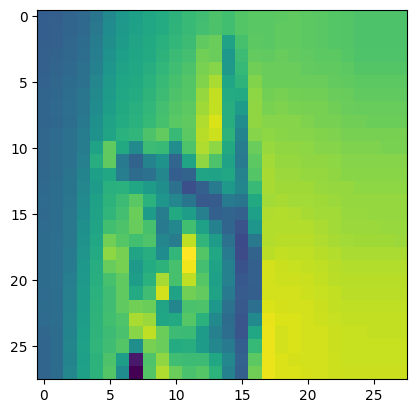

In [23]:
#visualization of augmented data
import matplotlib.pyplot as plt
plt.imshow(augmented_test_array[2]);

In [24]:
#combining the X-train and Y-train 
data=(augmented_train_array, y_train ,augmented_test_array,y_test)

In [25]:
#dumping data into pickle file
with open('../data/external/naugmented_data.pkl','wb') as f:
    pickle.dump(data, f)

In [26]:
#load the pickle file
with open('../data/external/augmented_data.pkl','rb') as f:
    X_aug_train,y_aug_train, X_aug_test , y_aug_test = pickle.load(f)

In [27]:
print(f'X_aug_train shape: {X_aug_train.shape}')
print(f'y_aug_train shape: {y_aug_train.shape}')
print(f'X_aug_test shape: {X_aug_test.shape}')
print(f'y_aug_test shape: {y_aug_test.shape}')

X_aug_train shape: (27455, 28, 28)
y_aug_train shape: (27455,)
X_aug_test shape: (7172, 28, 28)
y_aug_test shape: (7172,)


In [28]:
# Concatenate the arrays along the first axis (i.e., row-wise)
X_train_combined = np.concatenate((X_aug_train, X_train), axis=0)
y_train_combined = np.concatenate((y_aug_train, y_train), axis=0)

X_test_combined = np.concatenate((X_aug_test, X_test), axis=0)
y_test_combined = np.concatenate((y_aug_test, y_test), axis=0)



# Print the shape of the combined array
print("Shape of combined array:", X_train_combined.shape)

Shape of combined array: (54910, 28, 28)


In [30]:
#combining augmented data
combined_augmented_data=(X_train_combined, y_train_combined ,X_test_combined,y_test_combined)

In [31]:
#dumping data into pickle file
with open('../data/external/combined_augmented_data.pkl','wb') as f:
    pickle.dump(combined_augmented_data, f)